# $\text{AR}(1)$ with Offset

$\text{AR}(1)$ with a constant offset is defined by,

$
\begin{align}
X_t = \varphi X_{t-1} + \mu^* + \sigma \varepsilon_t
\end{align}
$

where, $\varepsilon \sim \text{Normal}(0,1)$

The stationarity requires $\lvert \varphi \rvert < 1$. The stationary mean and variance are given by,

$
\begin{align}
&\lim_{t \to \infty} \text{E}(X_t) = \frac{\mu^*}{1 - \varphi} \\
&\lim_{t \to \infty} \text{Var}(X_t) = \frac{\sigma^2}{1 - \varphi^2}
\end{align}
$

It follows that $X_t$ has distribution,

$
\begin{align}
X_t \sim \text{Normal}\left(  \frac{\mu}{1 - \varphi} ,  \frac{\sigma^2}{1 - \varphi^2} \right)
\end{align}
$

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib.models import arima
from lib import (Func, Source, Est, PlotType)
from lib import (stack, fpoints, fcurve, curve)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
σ = 1.0
nsample = 1000

def cumu_mean_plot(φ, σ, μ, nsample):
    ar = Source.AR_OFFSET.create(φ=[φ], σ=σ, μ=μ, npts=nsample)
    mean = Func.CUMU_MEAN.apply(ar)
    ar1_mean = Func.AR1_OFFSET_MEAN.apply(ar, φ=φ, μ=μ)
    fcurve(data=mean, func=ar1_mean, title_offset=1.025, plot_type=PlotType.XLOG)
    
def cumu_sd_plot(φ, σ, μ, nsample):
    ar = Source.AR_OFFSET.create(φ=[φ], σ=σ, μ=μ, npts=nsample)
    sd = Func.CUMU_SD.apply(ar)
    ar1_sd = Func.AR1_OFFSET_SD.apply(ar, φ=φ, σ=σ)
    fcurve(data=sd, func=ar1_sd, title_offset=1.025, plot_type=PlotType.XLOG)
    
def comparison_plot_μ(μ_vals, ylim, title, *params):
    labels = [r"$μ^*=$" + f"{val}" for val in μ_vals]
    scan = Source.AR_OFFSET.create_parameter_scan(*params)
    stack(scan, ylim=ylim, title=title, labels=labels)
    
def comparison_plot_φ(φ_vals, ylim, title, *params):
    labels = [f"φ={val}" for val in φ_vals] 
    scan = Source.AR_OFFSET.create_parameter_scan(*params)
    stack(scan, ylim=ylim, title=title, labels=labels)

## Simulation $\varphi$ Scan

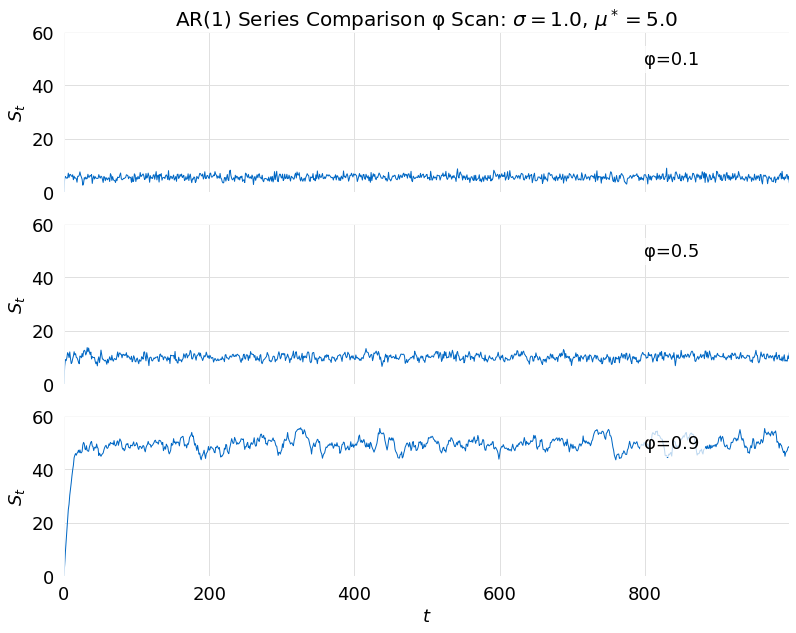

In [3]:
μ = 5.0
title = f"AR(1) Series Comparison φ Scan: $σ={{{σ}}}$, $μ^*={{{μ}}}$"
φ_vals = [0.1, 0.5, 0.9]
params = [{"φ": [φ], "σ": σ, "μ": μ, "npts": nsample} for φ in φ_vals]
comparison_plot_φ(φ_vals, [0.0, 60.0], title, *params)

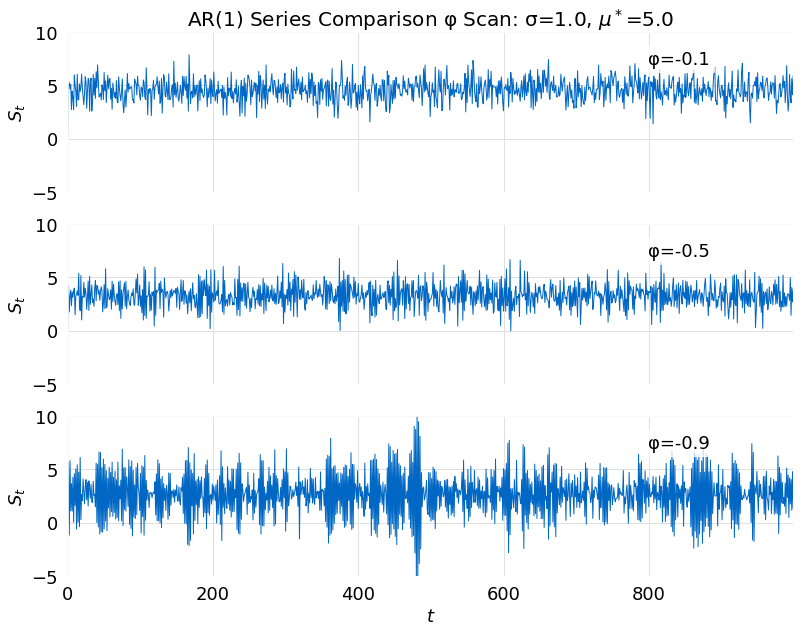

In [4]:
μ = 5.0
title = f"AR(1) Series Comparison φ Scan: σ={σ}, " + r"$μ^*$=" + f"{μ}"
φ_vals = [-0.1, -0.5, -0.9]
params = [{"φ": [φ], "σ": σ, "μ": μ, "npts": nsample} for φ in φ_vals]
comparison_plot_φ(φ_vals, [-5.0, 10.0], title, *params)

## Simulation $\mu^*$ Scan

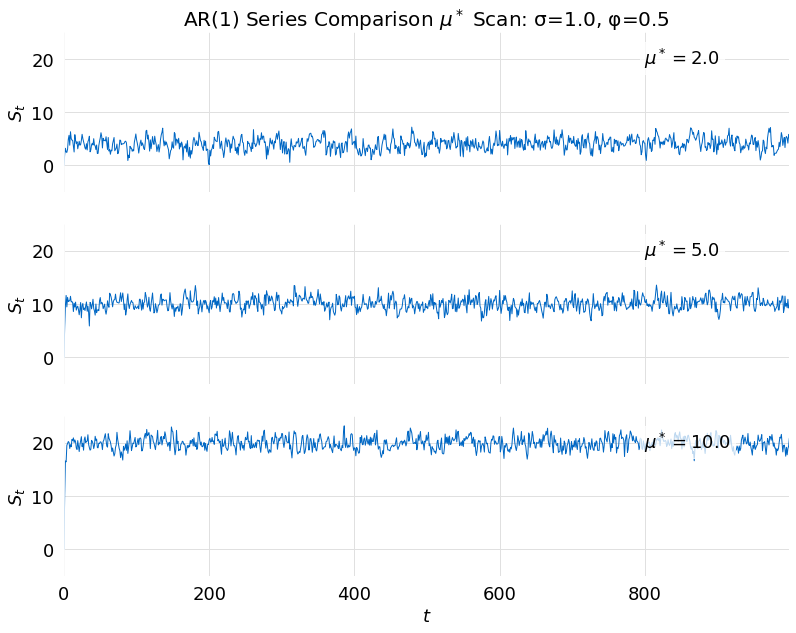

In [5]:
φ = 0.5
title = f"AR(1) Series Comparison " + r"$\mu^*$" + f" Scan: σ={σ}, φ={φ}"
μ_vals = [2.0, 5.0, 10.0]
params = [{"φ": [φ], "σ": σ, "μ": μ, "npts": nsample} for μ in μ_vals]
comparison_plot_μ(μ_vals, [-5.0, 25.0], title, *params)

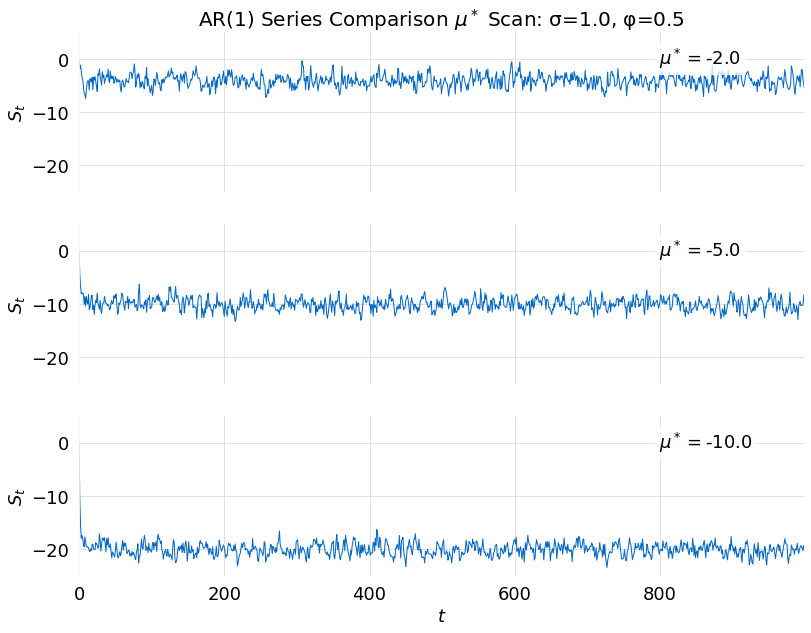

In [6]:
title = f"AR(1) Series Comparison " + r"$\mu^*$" + f" Scan: σ={σ}, φ={φ}"
μ_vals = [-2.0, -5.0, -10.0]
params = [{"φ": [φ], "σ": σ, "μ": μ, "npts": nsample} for μ in μ_vals]
comparison_plot_μ(μ_vals, [-25.0, 5.0], title, *params)

## Mean

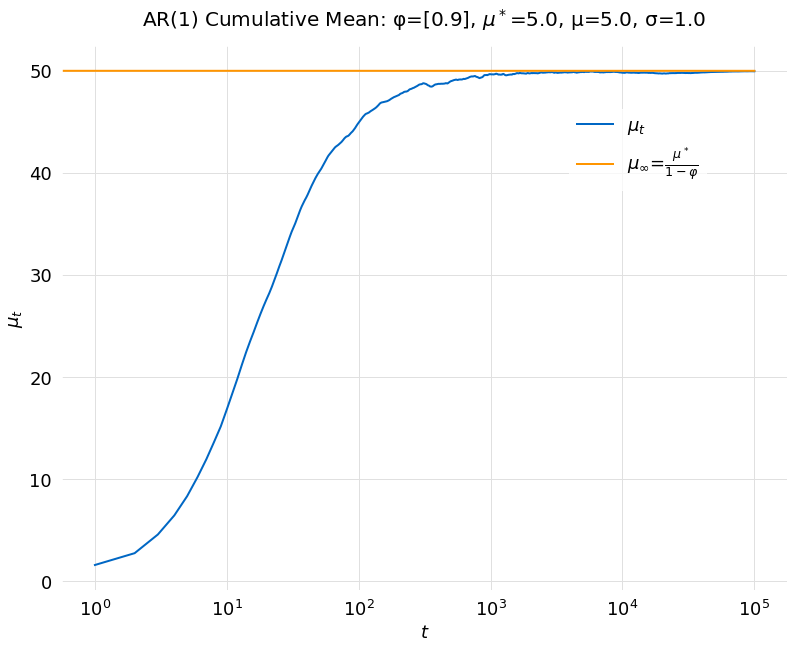

In [7]:
φ = 0.9
μ = 5.0
nsample = 100000
cumu_mean_plot(φ, σ, μ, nsample)

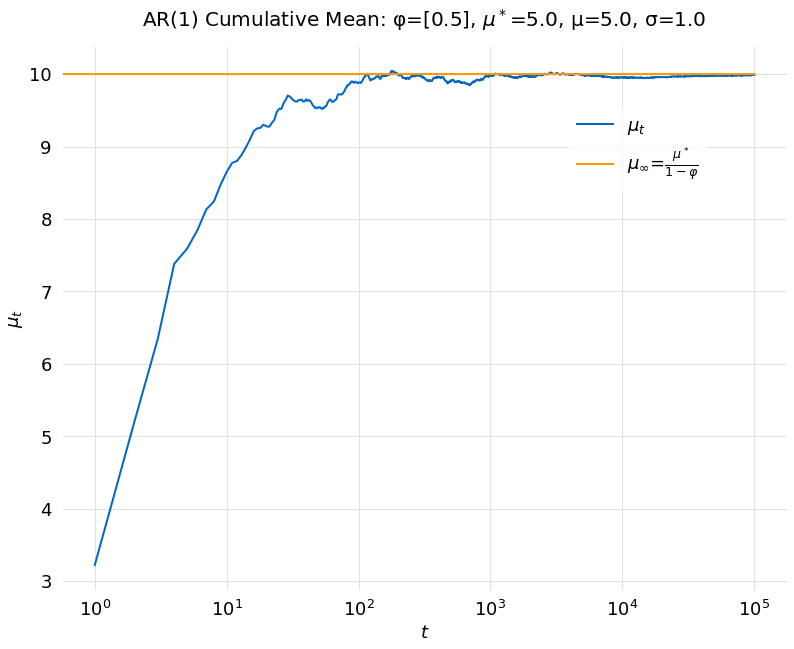

In [8]:
φ = 0.5
μ = 5.0
nsample = 100000
cumu_mean_plot(φ, σ, μ, nsample)

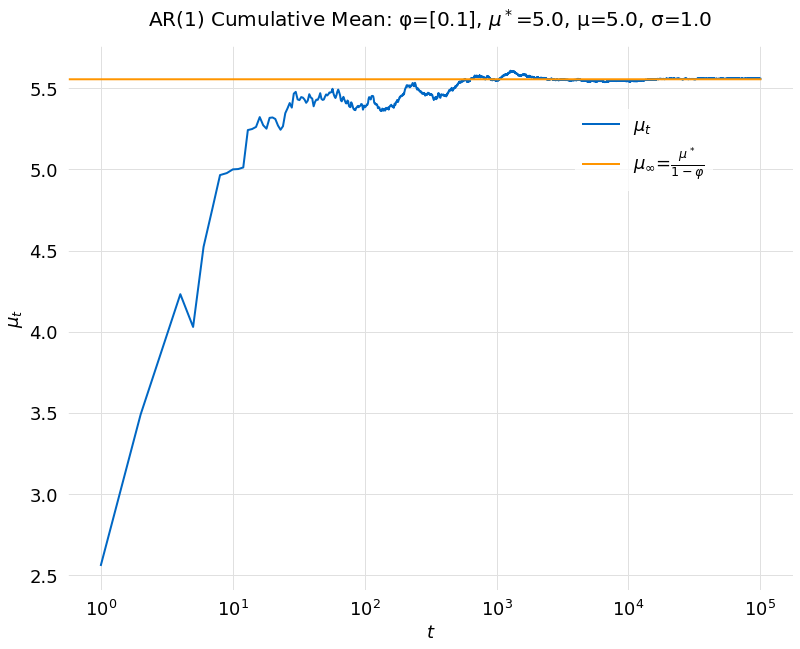

In [9]:
φ = 0.1
μ = 5.0
nsample = 100000
cumu_mean_plot(φ, σ, μ, nsample)

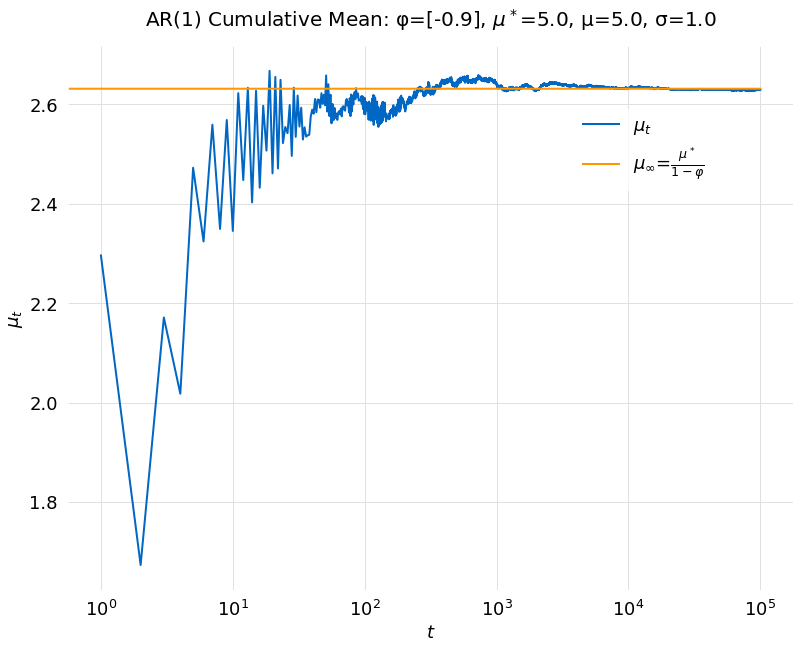

In [10]:
φ = -0.9
μ = 5.0
nsample = 100000
cumu_mean_plot(φ, σ, μ, nsample)

## Standard Deviation

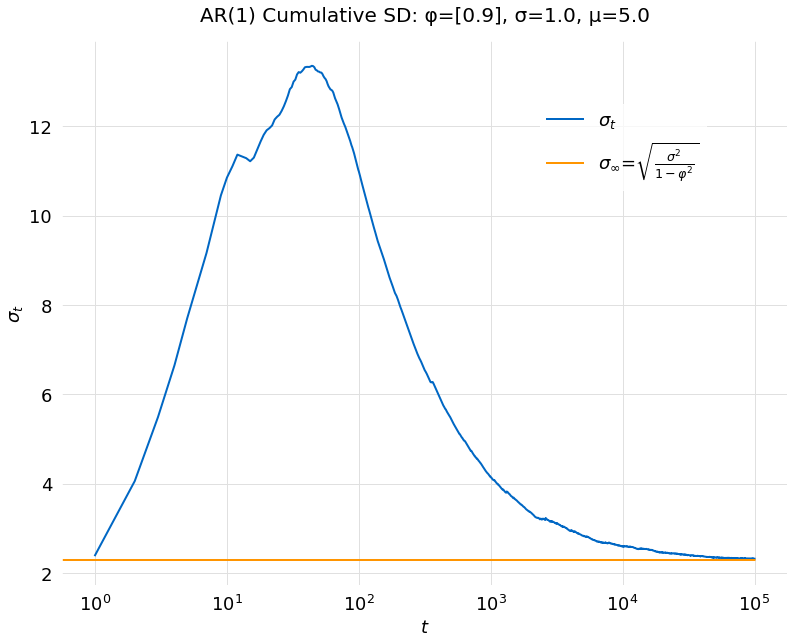

In [11]:
φ = 0.9
nsample = 100000
cumu_sd_plot(φ, σ, μ, nsample)

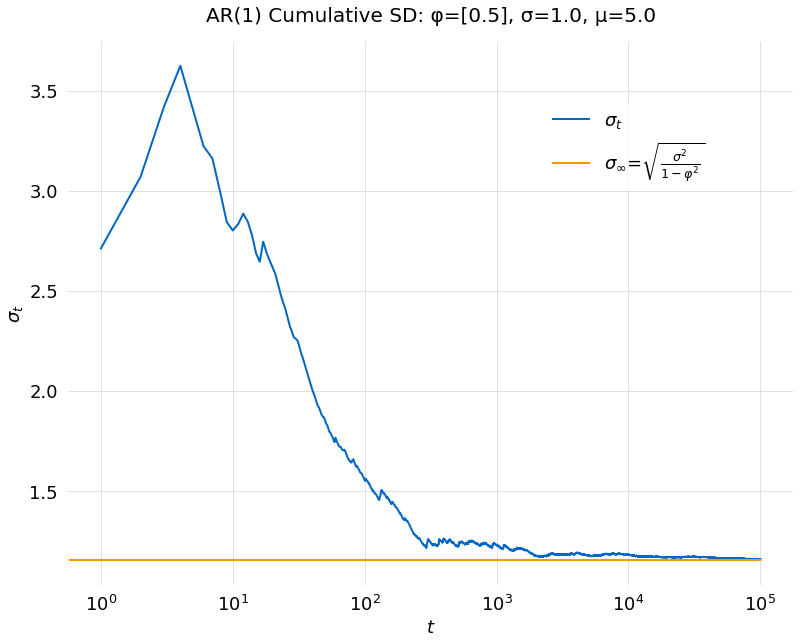

In [12]:
φ = 0.5
nsample = 100000
cumu_sd_plot(φ, σ, μ, nsample)

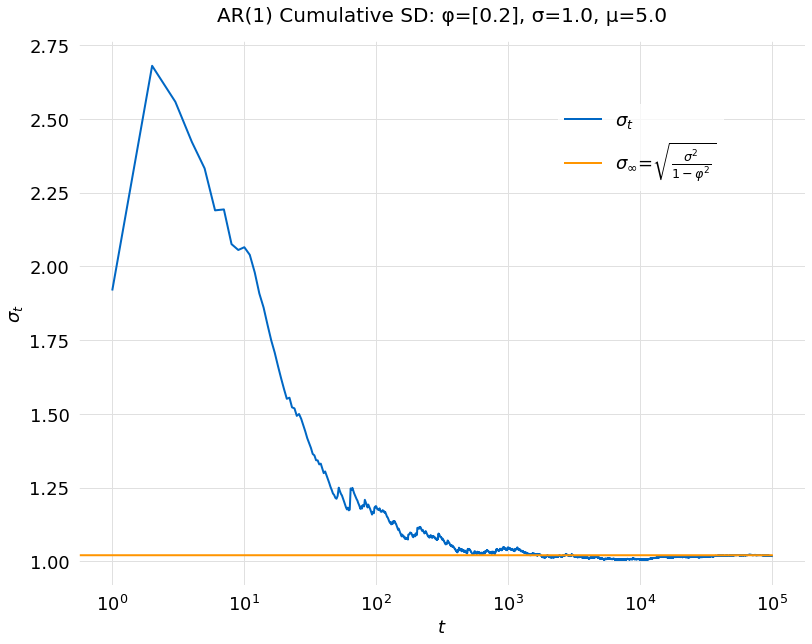

In [13]:
φ = 0.2
nsample = 100000
cumu_sd_plot(φ, σ, μ, nsample)

## Parameter Estimation

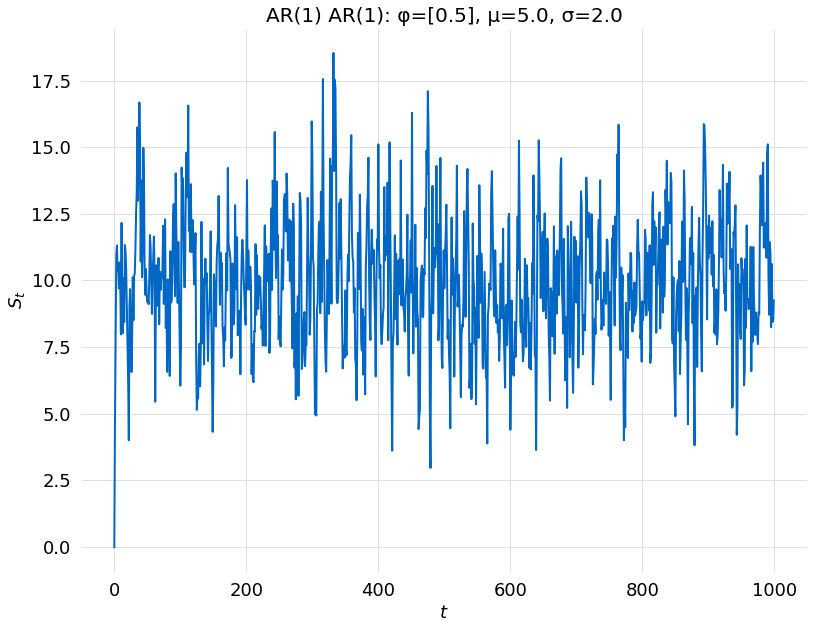

In [14]:
φ = 0.5
μ = 5.0
σ = 2.0
nsample = 1000
df = Source.AR_OFFSET.create(φ=[φ], μ=μ, σ=σ, npts=nsample)
curve(df)

In [15]:
results = Est.AR_OFFSET.perform(df, order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2129.878
Date:                Fri, 17 Jun 2022   AIC                           4265.756
Time:                        12:19:40   BIC                           4280.480
Sample:                             0   HQIC                          4271.352
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9156      0.137     72.350      0.000       9.647      10.184
ar.L1          0.5387      0.026     20.821      0.000       0.488       0.589
sigma2         4.1434      0.185     22.397      0.000       3.781       4.506
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.03
Prob(Q):                              0.99   Prob(JB):                         0.36
Heteroskedasticity (H):               0.93   Skew:                             0.10
Prob(H) (two-sided):                  0.51   Kurtosis:                         3.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
df.attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '17/06/2022 12:19:40',
 'Type': <Source.AR_OFFSET: 'AR_OFFSET'>,
 'Name': 'AR(1)-Simulation-3e5e3e1d-4e93-438d-98fc-c023067df94b',
 'SchemaIterations': None,
 'AR_OFFSET': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.5], 'μ': 5.0, 'σ': 2.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR_OFFSET(1)': {'Type': <Est.AR_OFFSET: 'AR_OFFSET'>,
    'Const': {'Estimate': 9.915649466502975,
     'Error': 0.137050446183941,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.5387174589918872,
      'Error': 0.02587398641823529,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'}],
    'Sigma2': {'Estimate': 4.1434356291

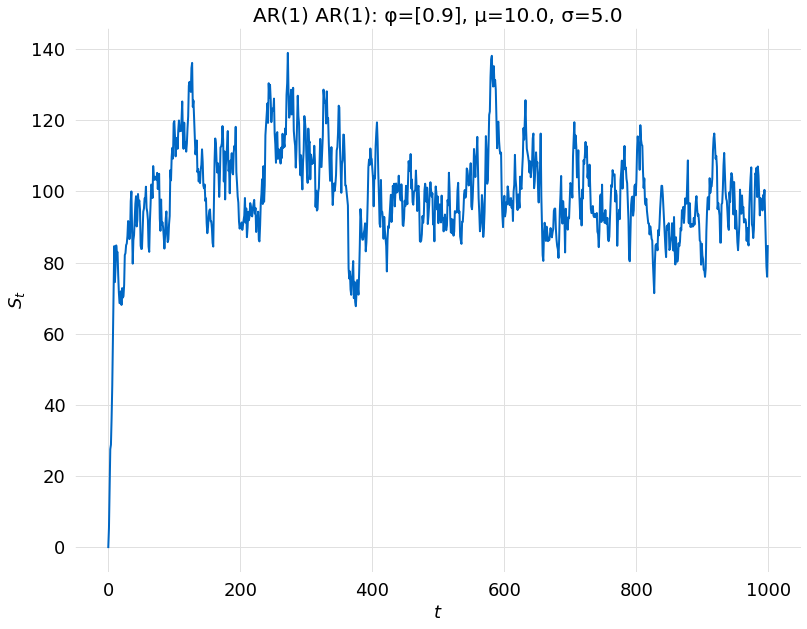

In [17]:
φ = 0.9
μ = 10.0
σ = 5.0
nsample = 1000
df = Source.AR_OFFSET.create(φ=[φ], μ=μ, σ=σ, npts=nsample)
curve(df)

In [18]:
results = Est.AR_OFFSET.perform(df, order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3070.692
Date:                Fri, 17 Jun 2022   AIC                           6147.385
Time:                        12:19:41   BIC                           6162.108
Sample:                             0   HQIC                          6152.981
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.8159      3.092     31.316      0.000      90.756     102.875
ar.L1          0.9511      0.004    215.396      0.000       0.942       0.960
sigma2        27.1433      1.182     22.957      0.000      24.826      29.461
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):                51.47
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                            -0.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
df.attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '17/06/2022 12:19:40',
 'Type': <Source.AR_OFFSET: 'AR_OFFSET'>,
 'Name': 'AR(1)-Simulation-49df4aa5-2ec6-4355-84c0-b089525d706c',
 'SchemaIterations': None,
 'AR_OFFSET': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.9], 'μ': 10.0, 'σ': 5.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR_OFFSET(1)': {'Type': <Est.AR_OFFSET: 'AR_OFFSET'>,
    'Const': {'Estimate': 96.81589849136195,
     'Error': 3.0915929624232237,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.9510587279976427,
      'Error': 0.004415391902010718,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'}],
    'Sigma2': {'Estimate': 27.143273

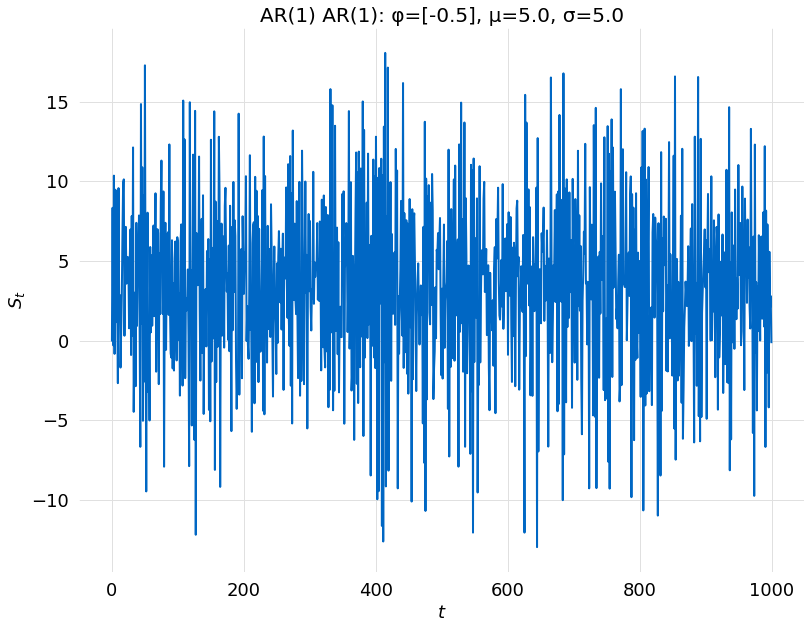

In [20]:
φ = -0.5
μ = 5.0
nsample = 1000
df = Source.AR_OFFSET.create(φ=[φ], μ=μ, σ=σ, npts=nsample)
curve(df)

In [21]:
results = Est.AR_OFFSET.perform(df, order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2980.681
Date:                Fri, 17 Jun 2022   AIC                           5967.362
Time:                        12:19:41   BIC                           5982.086
Sample:                             0   HQIC                          5972.958
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3588      0.103     32.652      0.000       3.157       3.560
ar.L1         -0.4814      0.028    -17.064      0.000      -0.537      -0.426
sigma2        22.7196      1.039     21.865      0.000      20.683      24.756
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 7.00
Prob(Q):                              0.90   Prob(JB):                         0.03
Heteroskedasticity (H):               1.08   Skew:                            -0.20
Prob(H) (two-sided):                  0.46   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
df.attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '17/06/2022 12:19:41',
 'Type': <Source.AR_OFFSET: 'AR_OFFSET'>,
 'Name': 'AR(1)-Simulation-e38b3490-8fee-4fc5-ae27-addd48d3a89e',
 'SchemaIterations': None,
 'AR_OFFSET': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [-0.5], 'μ': 5.0, 'σ': 5.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR_OFFSET(1)': {'Type': <Est.AR_OFFSET: 'AR_OFFSET'>,
    'Const': {'Estimate': 3.358847735412938,
     'Error': 0.1028686323534989,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': -0.48137890000341327,
      'Error': 0.028211025822782648,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'}],
    'Sigma2': {'Estimate': 22.7196